# The perceptron - a simple simulation


<div>Table of contents</div>
<div id="toc"></div>

In [86]:
%matplotlib inline
from pylab import *
from utils import *

Let us start by implementing a very simple network. Our network will only have two input units plus a bias unit, as in the figure. 
The network will learn to categorize few different input patterns as belonging or not to a class.



### Training
#### Initializing data and parameters
In this example we will create input data with pseudo-random number generation.
We will start from two points, the centroids, and create all patterns in each group (belonging/not belonging) adding noise to each centroid.

In [87]:
#-------------------------------------------------
# Training


# Constants

# Number of input elements
n = 2        

# Learning rate
eta = 0.0001 

# number of training patterns
n_patterns = 2000

# Number of repetitions of 
# the pattern series
epochs = 4

# Number of timesteps
stime = n_patterns*epochs


# Variables

# generate raining data (function build_dataset in utils.py)
data = build_dataset(n_patterns)

# Each row of P is an input pattern
P = data[:,:2]

# Each element of o is the desired output 
# relative to an input pattern
o = data[:,2]

# Initialize weights
w = zeros(n+1)

# Initialize the weight history storage
dw = zeros([n+1,stime])

# Initialize the error history storage
squared_errors = zeros(epochs)

Let's plot the input points. Red points belong to the class to be learned, while blue ones do not belong to it.

#### Spreading of the network during training
Here starts the core part, iterating the timesteps. We also divide the training phase in epochs. Each epoch is a single presentation of the whole input pattern series. The sum of squared errors will be grouped by epochs.

In [88]:
# Create a list of pattern indices.
# We will reshuffle it at each 
# repetition of the series
pattern_indices = arange(n_patterns)

# counter of repetitions 
# of the series of patterns
epoch = -1

for t in xrange(stime) :
    
    # Reiterate the input pattern 
    # sequence through timesteps
    
    # Reshuffle at the end 
    # of the series
    if t%n_patterns == 0:
        shuffle(pattern_indices)
        epoch += 1
        
    # Current pattern 
    k = pattern_indices[t%n_patterns]
    
    # MAIN STEP CALCULATIONS
     
    # Bias-plus-input vector
    x = hstack([1, P[k]])
    
    # Weighted sum - !!dot product!!
    net = dot(w, x)
    
    # Activation
    y = step(net)
    
    # Learning
    w += eta*(o[k] - y)*x
       
    # Store current weights
    dw[:,t] = w
    
    # Current error
    squared_errors[epoch] += 0.5*(o[k] - y)**2

#### Plotting the results of training
We plot the final decision boundary together with the history of the squared errors through epocs.

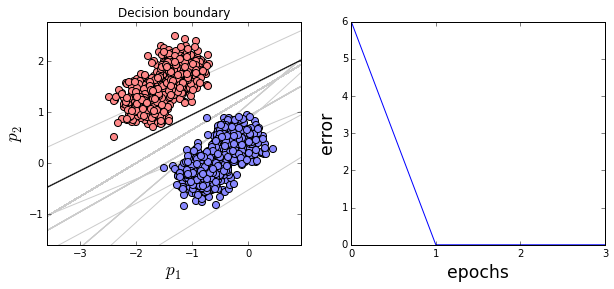

In [89]:
# Create the figure
fig = figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax.set_title('Decision boundary')

# Chose the x-axis coords of the
# two points to plot the decision 
# boundary line
x1 = array([lower_bound[0],upper_bound[0]])

# Calculate the y-axis coords of the
# two points to plot the decision 
# boundary line as it changes 
for t in xrange(stime) :
    
    # Show evert 10th timestep
    if t%10 == 0:
        
        if dw[2,t] != 0 :
            # Evaluate x2 based on current weights
            x2 = -(dw[1,t]*x1 + dw[0,t])/dw[2,t]
        
            # Plot the changes in the boundary line during learning
            ax.plot(x1,x2, c='#cccccc', linewidth = 1, zorder = 1)

# Evaluate x2 ibased on final weights
x2 = -(w[1]*x1 + w[0])/w[2]

# Plot the learned boundary line
plot(x1,x2, c= '#000000', linewidth = 1, zorder = 1)

# Plot in red points belonging to the class
scatter(*P[(n_patterns/2):,:].T, s = 50,  c = '#ff8888', zorder = 2 )       
# Plot in blue points not belonging to the class 
scatter(*P[:(n_patterns/2),:].T, s = 50,  c = '#8888ff', zorder = 2 )

# Limits and labels of the plot
xlim( [lower_bound[0], upper_bound[0]] )
ylim( [lower_bound[1], upper_bound[1]] )
xlabel("$p_1$", size = 'xx-large')
ylabel("$p_2$", size = 'xx-large')

# Plot squared errors
ax = fig.add_subplot(122)
ax.plot(squared_errors)

# Labels and ticks of the plot
xlabel("epochs", size = 'xx-large')
ylabel("error", size = 'xx-large')
xticks(range(epochs)) 

show()

### Testing
#### Initializing data and parameters
Now we create a new dataset to test the network: 

In [90]:
#-------------------------------------------------
# Test

# Number of test patterns
n_patterns = 200

# Generating test data - we use a single repeated centroid
# so we have a single population of points expanding across
# the decision boundary line  
test_centroid = lower_bound +(upper_bound-lower_bound)/2.0

# Generating test data - build_dataset function from utils.py. 
# We change the standard deviation 
data = build_dataset(n_patterns, 
                      centroids1 = [ test_centroid ],
                      centroids2 = [ test_centroid ],
                      std_deviation = 0.6 )

# Each row of P is a test pattern
P = data[:,:2]

# Each element of o is the desired output 
# relative to an input pattern
o = data[:,2]

y = zeros(n_patterns)
squared_errors = zeros(n_patterns)

#### Spreading of the network during test
We only do spreading in each timestep

In [91]:
# iterate tests
for t in xrange(n_patterns) :
    
    # Bias-plus-input vector
    x = hstack([1, P[t]])
    
    # Weighted sum - !!dot product!!
    net = dot(w, x)
    
    # Activation
    y[t] = step(net)

#### Plotting the results of test
We plot all test patterns using the output of the network to color them. Red and blue dots correspond to patterns belonging or not belonging to the class.

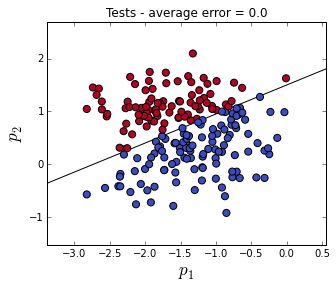

In [92]:
# Evaluate bounds
upper_bound = P.max(0) + 0.2*(P.max(0)-P.min(0))
lower_bound = P.min(0) - 0.2*(P.max(0)-P.min(0))

# Create the figure
fig = figure(figsize=(5,4))


title('Tests - average error = {}'.format(mean(squared_errors).round(4)))

# Chose the x-axis coords of the
# two points to plot the decision 
# boundary line
x1 = array([lower_bound[0],upper_bound[0]])

# Calculate the y-axis coords ofi the
# two points to plot the decision 
# boundary line

# Evaluate x2 based on final weights
x2 = -(w[1]*x1 + w[0])/w[2]

# Plot
plot(x1,x2, c= '#000000', linewidth = 1, zorder = 1)

# Show points
ax = scatter(*P.T, s = 50,  c = 2*y -1, zorder = 2, cmap = cm.coolwarm )

#limits
xlim( [lower_bound[0], upper_bound[0]] )
ylim( [lower_bound[1], upper_bound[1]] )
xlabel("$p_1$", size = 'xx-large')
ylabel("$p_2$", size = 'xx-large')
show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
The next cell is just for styling

In [93]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../style/ipybn.css", "r").read()
    return HTML(styles)
css_styling()